In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, concat
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
# Convert series to supervised learning
def series_to_supervised(data, n_in=5, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [3]:
file_path=r"D:\miniProject\review2\technical_indicators\BHP\Return\BHPreturn.csv"
dataset = pd.read_csv(file_path,header=0,index_col=0)
values = dataset.values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 7, 2)
print(reframed.head())
print(reframed.shape)

    var1(t-7)  var2(t-7)  var3(t-7)  var4(t-7)  var5(t-7)  var6(t-7)  \
7    0.473464   0.399862   0.572502   0.505595   0.000000   0.270387   
8    0.480391   0.473464   0.399862   0.572502   0.136755   0.319360   
9    0.495793   0.480391   0.473464   0.399862   0.231230   0.370372   
10   0.591920   0.495793   0.480391   0.473464   0.112204   0.480676   
11   0.504141   0.591920   0.495793   0.480391   0.091429   0.333697   

    var7(t-7)  var8(t-7)  var9(t-7)  var10(t-7)  ...  var20(t+1)  var21(t+1)  \
7    0.251201   0.260576   0.349954    0.000000  ...    0.030320    0.292107   
8    0.301592   0.224096   0.307113    0.000000  ...    0.029384    0.336335   
9    0.339905   0.276756   0.277163    0.136755  ...    0.029384    0.353590   
10   0.429497   0.365488   0.375592    0.231230  ...    0.028448    0.261199   
11   0.430604   0.380006   0.392274    0.112204  ...    0.025753    0.287804   

    var22(t+1)  var23(t+1)  var24(t+1)  var25(t+1)  var26(t+1)  var27(t+1)  \
7     0.

In [4]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))

In [5]:
def build_mlp_classifier(input_size, output_size, num_classes=2, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(128, input_dim=input_size, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    if num_classes == 2:
        model.add(Dense(1, activation='sigmoid'))
    else:
        model.add(Dense(num_classes, activation='softmax'))
    return model

model = build_mlp_classifier(train_X.shape[1], 1)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

C:\Users\rithe\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(train_X, train_y,
                    validation_data=(test_X, test_y),
                    epochs=450,
                    batch_size=64,
                    verbose=2)

Epoch 1/450
58/58 - 2s - 33ms/step - accuracy: 5.4466e-04 - loss: 0.6969 - val_accuracy: 0.0000e+00 - val_loss: 0.6926
Epoch 2/450
58/58 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: 0.6940 - val_accuracy: 0.0000e+00 - val_loss: 0.6925
Epoch 3/450
58/58 - 0s - 4ms/step - accuracy: 0.0000e+00 - loss: 0.6934 - val_accuracy: 0.0000e+00 - val_loss: 0.6920
Epoch 4/450
58/58 - 0s - 5ms/step - accuracy: 2.7233e-04 - loss: 0.6930 - val_accuracy: 0.0000e+00 - val_loss: 0.6919
Epoch 5/450
58/58 - 0s - 5ms/step - accuracy: 2.7233e-04 - loss: 0.6926 - val_accuracy: 0.0000e+00 - val_loss: 0.6918
Epoch 6/450
58/58 - 0s - 6ms/step - accuracy: 2.7233e-04 - loss: 0.6922 - val_accuracy: 0.0000e+00 - val_loss: 0.6913
Epoch 7/450
58/58 - 0s - 5ms/step - accuracy: 2.7233e-04 - loss: 0.6920 - val_accuracy: 0.0000e+00 - val_loss: 0.6910
Epoch 8/450
58/58 - 0s - 5ms/step - accuracy: 5.4466e-04 - loss: 0.6916 - val_accuracy: 0.0000e+00 - val_loss: 0.6906
Epoch 9/450
58/58 - 0s - 4ms/step - accuracy: 2.7233e-0

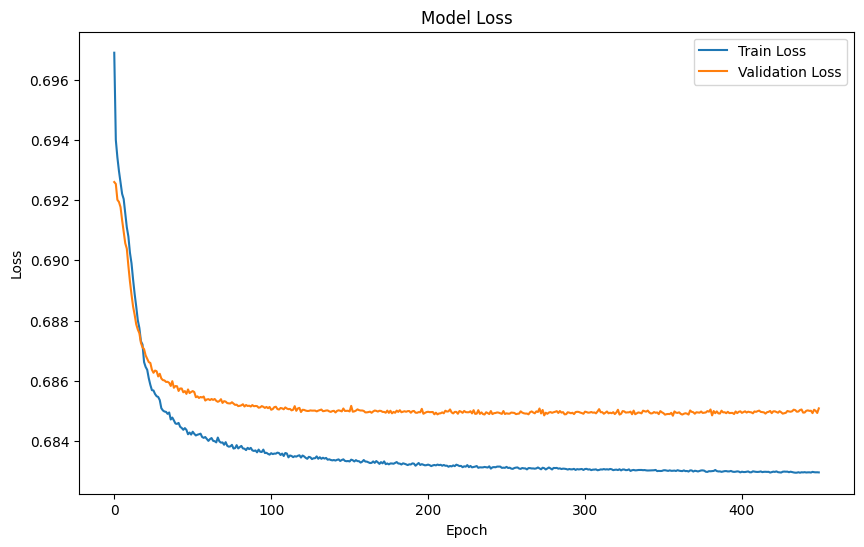

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_probs = model.predict(test_X)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")
test_y_binary = (test_y > 0.5).astype("int32")
cm = confusion_matrix(test_y_binary, y_pred_classes)
print("Confusion Matrix:")
print(cm)
cr = classification_report(test_y_binary, y_pred_classes)
print("Classification Report:")
print(cr)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[941  21]
 [ 44 569]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       962
           1       0.96      0.93      0.95       613

    accuracy                           0.96      1575
   macro avg       0.96      0.95      0.96      1575
weighted avg       0.96      0.96      0.96      1575

